In [63]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Read in Data

In [64]:
biogrid = pd.read_csv("Files/Biogrid.txt", sep='\t')
huri = pd.read_csv("Files/Huri.txt", sep='\t')
reactome = pd.read_csv("Files/Reactome.txt", sep='\t')
string = pd.read_csv("Files/String.txt", sep='\t')

disease = pd.read_csv("Files/Cardiomyopathy.txt").iloc[:,0].tolist()

# THOMAS: TO DO: REMOVE SELF-LOOPS!!! <3

In [65]:
# THOMAS: TO DO: REMOVE SELF-LOOPS!!! <3
same_gene_rows = biogrid[biogrid["GeneA"] == biogrid["GeneB"]]
same_gene_rows2 = huri[huri["GeneA"] == huri["GeneB"]]
same_gene_rows3 = reactome[reactome["GeneA"] == reactome["GeneB"]]
same_gene_rows4 = string[string["GeneA"] == string["GeneB"]]
same_gene_rows

,GeneA,GeneB
7236,TNNI3,TNNI3
545089,SLURP1,SLURP1


In [66]:
biogrid.head()

,GeneA,GeneB
0,MAP2K4,FLNC
1,MYPN,ACTN2
2,ACVR1,FNTA
3,GATA2,PML
4,RPA2,STAT3


Build graph of interactome LCC size to find all the nodes and links (not just disease)

In [67]:
#biogrid unique disease genes
biogrid_all_genes_unique = list(set(biogrid["GeneA"]) | set(biogrid["GeneB"]))
len(biogrid_all_genes_unique)

biogrid_graph = nx.Graph(name = "biogrid_interactions")

edges = []
for i in range(0,biogrid.shape[0]):
    edges.append((biogrid.iloc[i,0],biogrid.iloc[i,1]))

biogrid_graph.add_nodes_from(biogrid_all_genes_unique)
biogrid_graph.add_edges_from(edges)

### 1.3. Compute and characterize the disease LCC 

1.3.1 Check for the presence of disease genes in the LCCs of each interactome
(as from point 1.1) and identify the disease interactomes by getting the
interactions among disease genes

In [68]:
biogrid_filter = biogrid["GeneA"].isin(disease) & biogrid["GeneB"].isin(disease)
biogrid_disease_interactions = biogrid[biogrid_filter].reset_index(drop=True)

huri_filter = huri["GeneA"].isin(disease) & huri["GeneB"].isin(disease)
huri_disease_interactions = huri[huri_filter].reset_index(drop=True)

reactome_filter = reactome["GeneA"].isin(disease) & reactome["GeneB"].isin(disease)
reactome_disease_interactions = reactome[reactome_filter].reset_index(drop=True)

string_filter = string["GeneA"].isin(disease) & string["GeneB"].isin(disease)
string_disease_interactions = string[string_filter].reset_index(drop=True)

In [69]:
#biogrid unique disease genes
biogrid_disease_genes_unique = list(set(biogrid_disease_interactions["GeneA"]) | set(biogrid_disease_interactions["GeneB"]))
len(biogrid_disease_genes_unique)

301

In [70]:
biogrid_disease_graph = nx.Graph(name = "biogrid_disease_interactions")

edges = []
for i in range(0,biogrid_disease_interactions.shape[0]):
    edges.append((biogrid_disease_interactions.iloc[i,0],biogrid_disease_interactions.iloc[i,1]))

biogrid_disease_graph.add_nodes_from(biogrid_disease_genes_unique)
biogrid_disease_graph.add_edges_from(edges)

In [71]:
print(biogrid_disease_graph.number_of_nodes())

301


undirected graph


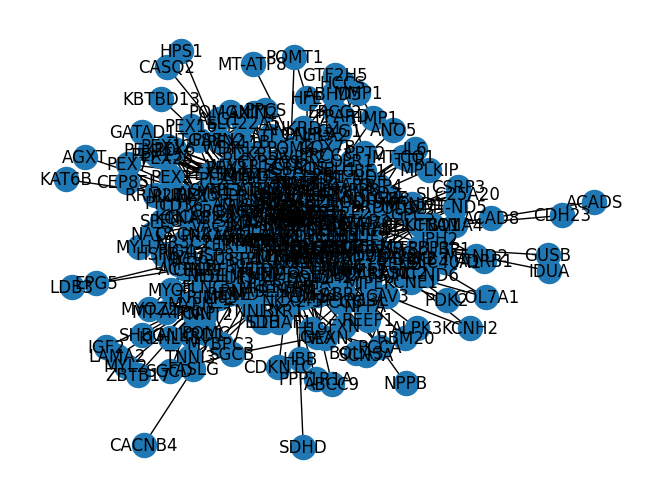

In [72]:
## Visualizing Graphs
print("undirected graph")

nx.draw(biogrid_disease_graph, with_labels=True)
plt.show()

1.3.2 Summarize the Interactome and GDA-related data as in table 1

In [76]:
biogrid.shape
table1_dict = {
    'biogrid': {},
    'huri': {},
    'reactome': {},
    'string': {}
}

#1
table1_dict["biogrid"]["nodes_edges"] = (biogrid_graph.number_of_nodes(), biogrid_graph.number_of_edges())
#2
table1_dict["biogrid"]["nr_disease_genes"] = len(biogrid_disease_genes_unique)
#3
percent = round((len(biogrid_disease_genes_unique)/len(biogrid_all_genes_unique))*100,2)
table1_dict["biogrid"]["percent"] = percent
#4
# extract connected components and sorting them from the largest (key: number of nodes) to the smallest

print("Extracing largest connected component (LCC)..." + '\n')

LCC_biogrid_disease = sorted(nx.connected_components(biogrid_disease_graph), key=len, reverse=True)
# G.subgraph returns a graph H that contains:
# 1. only the nodes specified in nodes
# 2. only the arcs connecting those nodes that already existed in G
LCC_biogrid_disease = biogrid_disease_graph.subgraph(LCC_biogrid_disease[0])
table1_dict["biogrid"]["disease_lcc_size"] = LCC_biogrid_disease.number_of_nodes()

#table1_dict
#LCC_biogrid_disease.number_of_nodes()


Extracing largest connected component (LCC)...



In [77]:
table1_dict


{'biogrid': {'nodes_edges': (20165, 907346),
  'nr_disease_genes': 301,
  'percent': 1.49,
  'disease_lcc_size': 301},
 'huri': {},
 'reactome': {},
 'string': {}}

1.3.3